## 参数theta的几何意义

<img src='./picture/5-1.png'>
<img src='./picture/5-2.png'>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data #只做简单的二分类问题
y = iris.target

X = X[y<2, :2]
y = y[y<2]


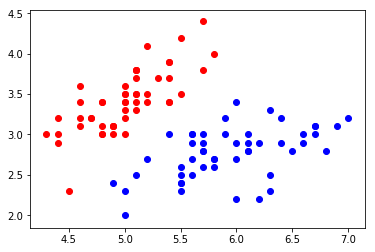

In [2]:
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.show()

In [3]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)
from LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)

LogisticRegression()

## 决策边界的可视化

In [4]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [5]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

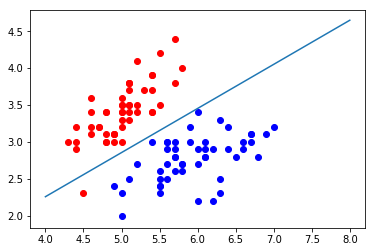

In [6]:
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

## 不规则的决策边界的绘制方法
> **通过空间中所有的点带入模型，观察最终的效果**

<img src='./picture/5-3.png'>


In [39]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) *100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) *100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


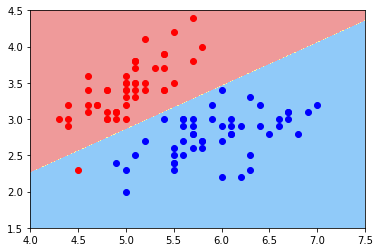

In [40]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5 , 4.5])
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.show()


### kNN的决策边界
> **无参数机器学习容易产生过拟合**

> **knn算法中n值越大模型越简单**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
knn_clf.score(X_test, y_test)

1.0

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


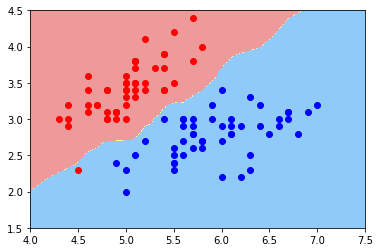

In [44]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5 , 4.5])
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.show()


In [45]:
knn_clf_all = KNeighborsClassifier()

In [46]:
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


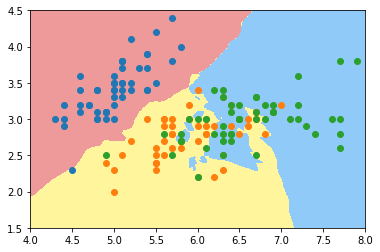

In [48]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5 , 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

plt.show()


In [49]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


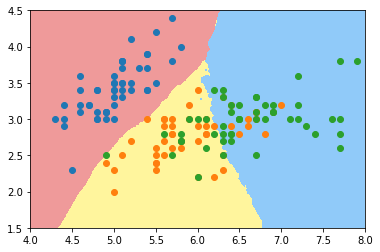

In [50]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5 , 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

plt.show()